In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to your raw data file
DATA_PATH = '../data/raw/transactions.csv'
df = pd.read_csv(DATA_PATH)

In [2]:
## 📈 Task 2: Exploratory Data Analysis (EDA)

### 1. Setup and Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for better visualization
sns.set_style("whitegrid")

# --- IMPORTANT: Ensure this path is correct for your PyCharm setup ---
DATA_PATH = '../data/raw/transactions.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print("✅ Data loaded successfully.")
except FileNotFoundError:
    print(f"❌ Error: File not found at {DATA_PATH}. Please check your file path.")
    # Stop execution if data is missing
    raise

### 2. Data Overview and Structure

print("\n--- Data Head (First 5 Rows) ---")
display(df.head())

print("\n--- Data Structure (Shape & Types) ---")
df.info()

print(f"\nTotal number of transactions: {df.shape[0]}")
print(f"Total number of unique customers: {df['CustomerId'].nunique()}")


### 3. Missing Value Analysis (Data Quality Check)

print("\n--- Missing Values Percentage ---")

# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create a DataFrame for easy viewing, sorting by percentage
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Percent', ascending=False)

# Display only columns with missing data
missing_df_non_zero = missing_df[missing_df['Missing Count'] > 0]
print(f"Number of columns with missing values: {len(missing_df_non_zero)}")
display(missing_df_non_zero)

# Visualize missing values (if any significant columns are missing)
if not missing_df_non_zero.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_df_non_zero.index, y=missing_df_non_zero['Missing Percent'])
    plt.title('Percentage of Missing Values per Column')
    plt.ylabel('Missing Percent (%)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

print("\nProceed to Step 4: Summary Statistics and Distribution Analysis...")

✅ Data loaded successfully.

--- Data Head (First 5 Rows) ---


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



--- Data Structure (Shape & Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 no

,Missing Count,Missing Percent



Proceed to Step 4: Summary Statistics and Distribution Analysis...



--- 4.1 Summary Statistics for Numerical Features ---


,Amount,Value,CountryCode,PricingStrategy
count,9.566200e+04,9.566200e+04,95662.0,95662.000000
mean,6.717846e+03,9.900584e+03,256.0,2.255974
std,1.233068e+05,1.231221e+05,0.0,0.732924
min,-1.000000e+06,2.000000e+00,256.0,0.000000
25%,-5.000000e+01,2.750000e+02,256.0,2.000000
50%,1.000000e+03,1.000000e+03,256.0,2.000000
75%,2.800000e+03,5.000000e+03,256.0,2.000000
max,9.880000e+06,9.880000e+06,256.0,4.000000



--- 4.2 Distribution of Transaction Value (Amount/Value) ---


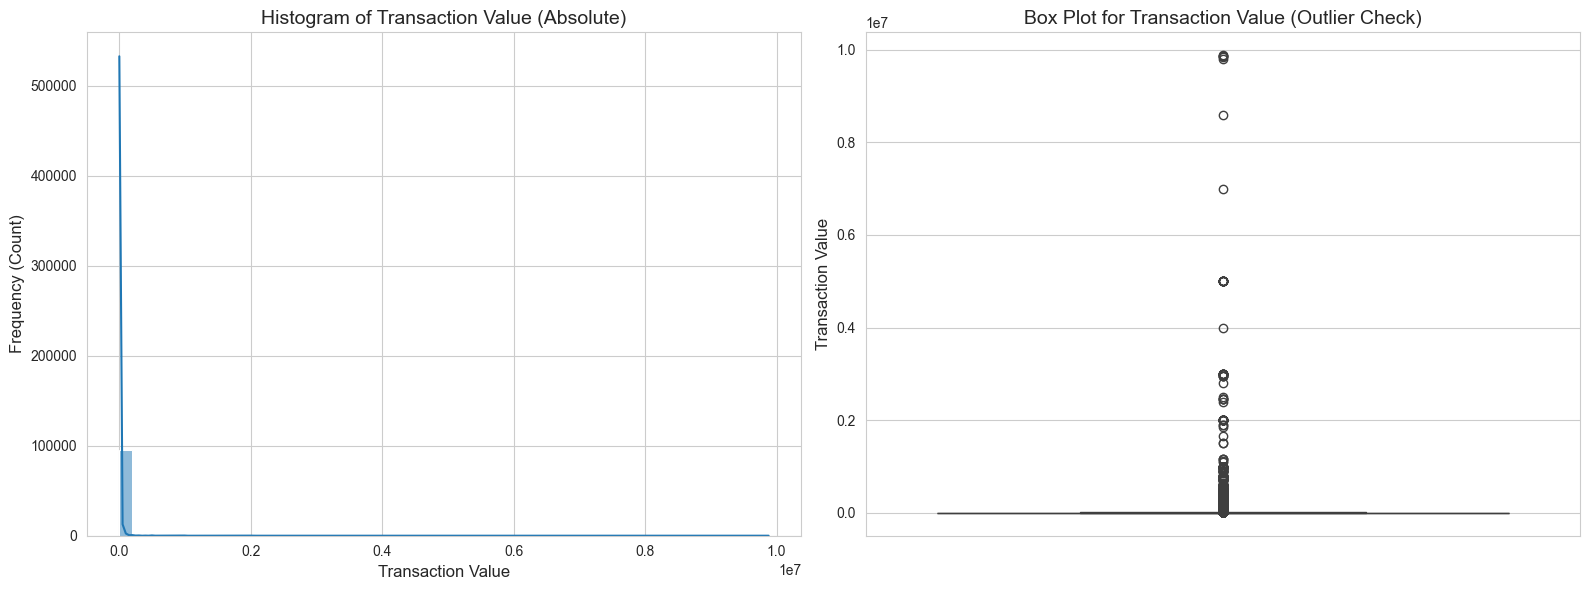


--- 4.3 Log-Transformed Distribution of Transaction Value ---


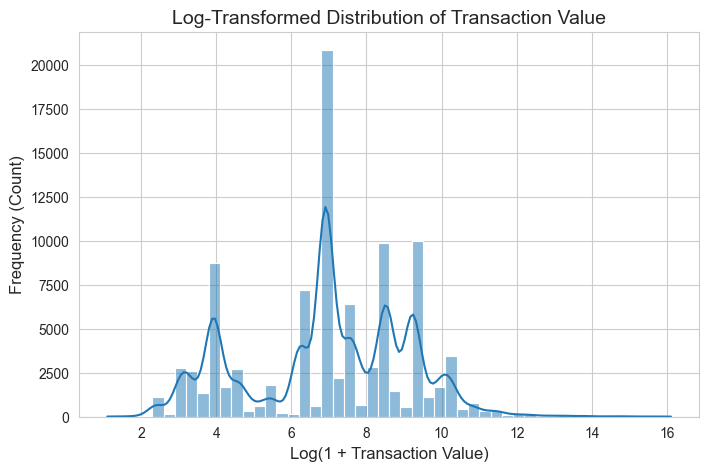


--- 4.4 Distribution of CountryCode and PricingStrategy ---


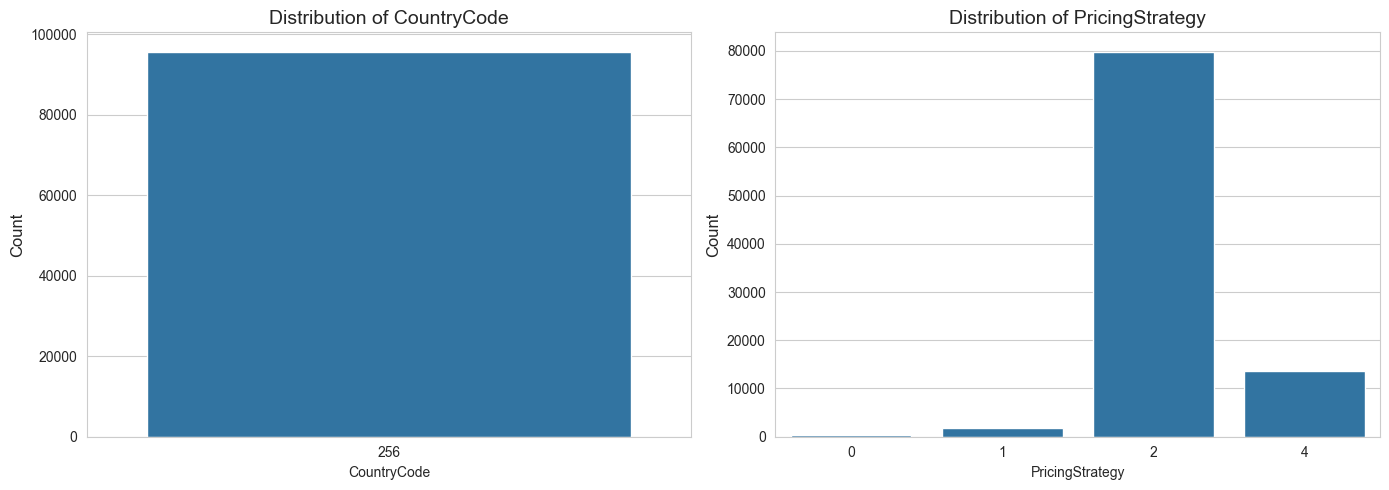


Proceed to Step 5: Categorical and Time-Series Analysis...


In [3]:
### 4. Summary Statistics and Numerical Distribution Analysis

# Define numerical columns for analysis
NUMERICAL_COLS = ['Amount', 'Value', 'CountryCode', 'PricingStrategy']

print("\n--- 4.1 Summary Statistics for Numerical Features ---")
display(df[NUMERICAL_COLS].describe())

# --- Analysis of Amount and Value ---
print("\n--- 4.2 Distribution of Transaction Value (Amount/Value) ---")

# Ensure Value is strictly positive for consistent analysis
df['Value_abs'] = df['Value'].abs()

# Create a figure with two subplots: Histogram and Box Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram (to check distribution and skewness)
sns.histplot(df['Value_abs'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Transaction Value (Absolute)', fontsize=14)
axes[0].set_xlabel('Transaction Value', fontsize=12)
axes[0].set_ylabel('Frequency (Count)', fontsize=12)

# Box Plot (to check for outliers)
sns.boxplot(y=df['Value_abs'], ax=axes[1])
axes[1].set_title('Box Plot for Transaction Value (Outlier Check)', fontsize=14)
axes[1].set_ylabel('Transaction Value', fontsize=12)

plt.tight_layout()
plt.show()

# --- Log Transformation for better visualization of highly skewed data ---
# Since transaction values are usually highly skewed, we check the log distribution
print("\n--- 4.3 Log-Transformed Distribution of Transaction Value ---")

# Only calculate log for non-zero positive values to avoid errors
df['Value_log'] = np.log1p(df[df['Value_abs'] > 0]['Value_abs'])

plt.figure(figsize=(8, 5))
sns.histplot(df['Value_log'].dropna(), bins=50, kde=True)
plt.title('Log-Transformed Distribution of Transaction Value', fontsize=14)
plt.xlabel('Log(1 + Transaction Value)', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.show()

# --- Analysis of CountryCode and PricingStrategy (Numerical but often treated as categorical) ---
print("\n--- 4.4 Distribution of CountryCode and PricingStrategy ---")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CountryCode distribution
sns.countplot(x='CountryCode', data=df, ax=axes[0])
axes[0].set_title('Distribution of CountryCode', fontsize=14)
axes[0].set_ylabel('Count', fontsize=12)

# PricingStrategy distribution
sns.countplot(x='PricingStrategy', data=df, ax=axes[1])
axes[1].set_title('Distribution of PricingStrategy', fontsize=14)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

print("\nProceed to Step 5: Categorical and Time-Series Analysis...")


--- 5.1 Distribution of Key Categorical Features ---


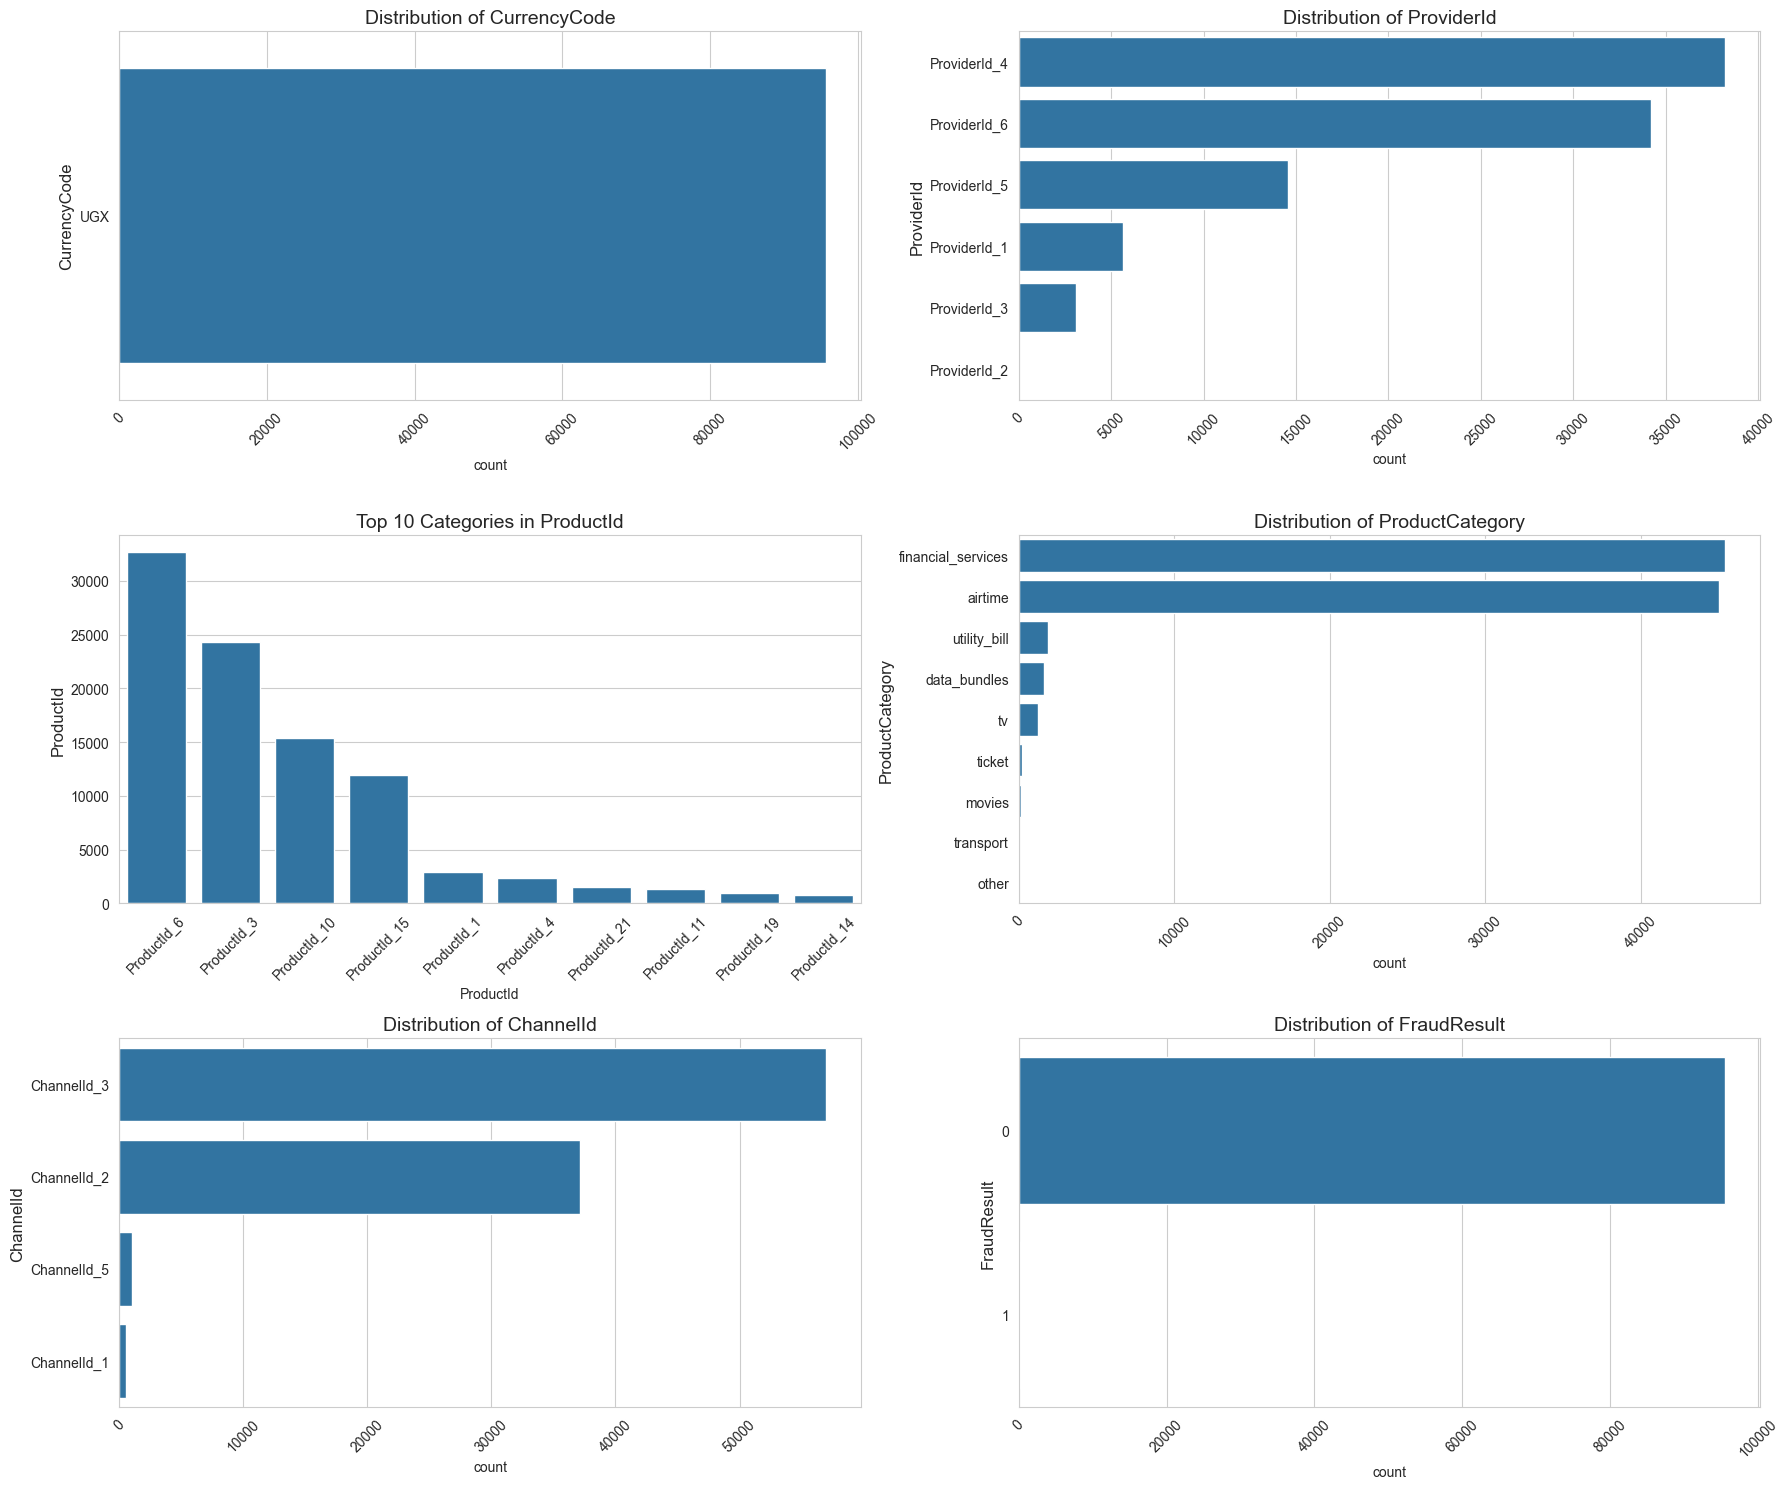


--- Categorical Cardinality Check ---
CurrencyCode: 1 unique values
ProviderId: 6 unique values
ProductId: 23 unique values
ProductCategory: 9 unique values
ChannelId: 4 unique values
FraudResult: 2 unique values

--- 5.2 Time-Series Analysis: Transaction Trends ---


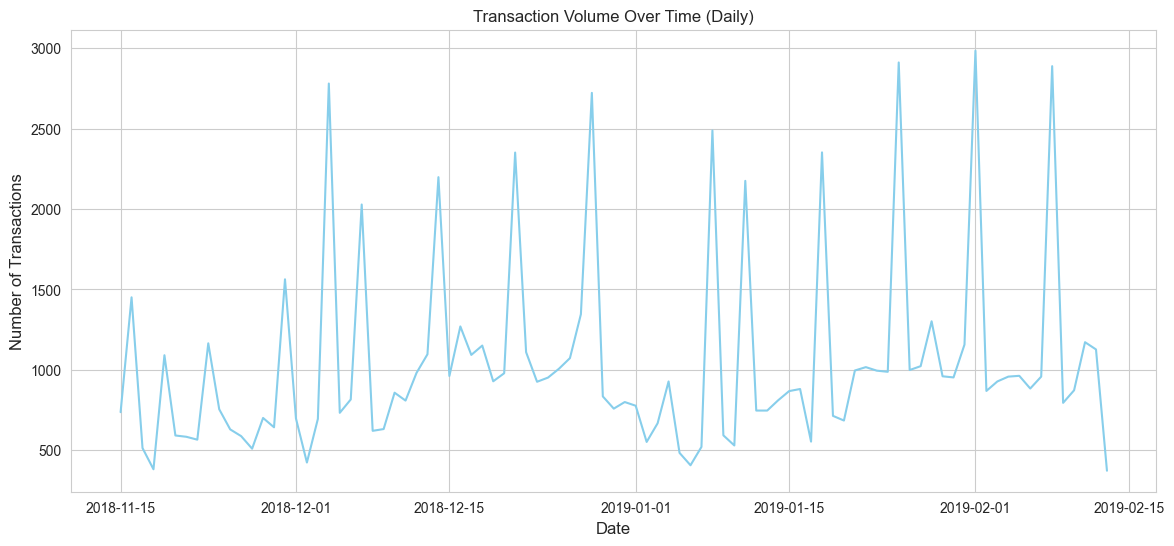

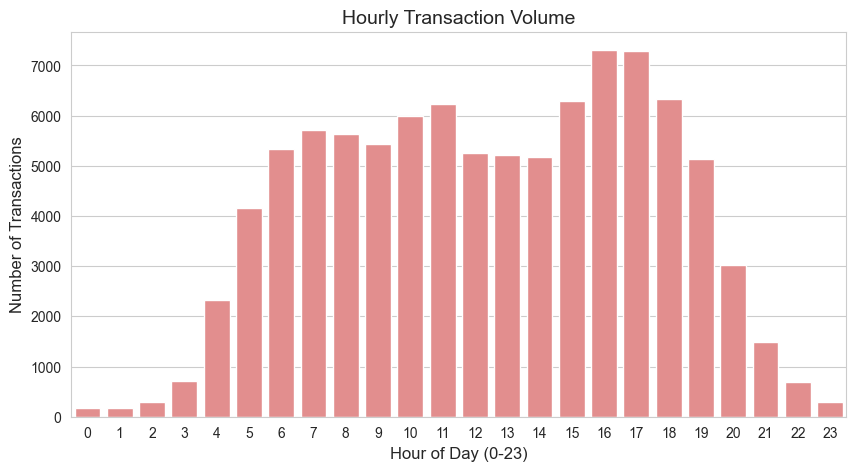

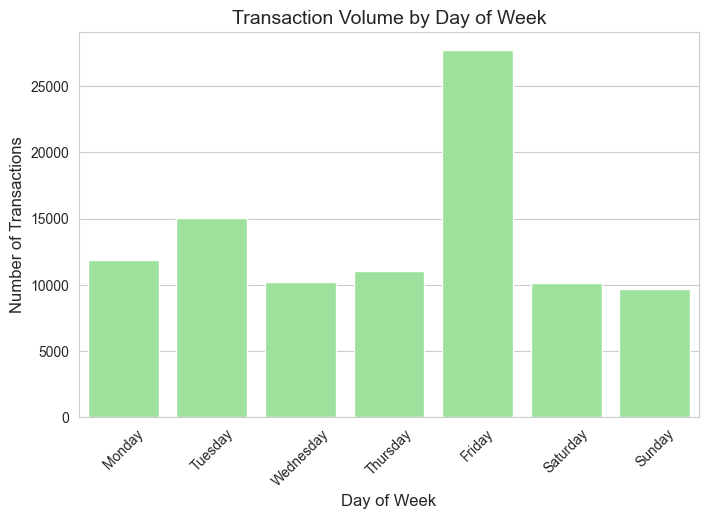


Proceed to Step 6: Final Correlation and Insights Summary...


In [4]:
### 5. Categorical and Time-Series Analysis

# 5.1 Categorical Feature Distribution

CATEGORICAL_COLS = [
    'CurrencyCode', 'ProviderId', 'ProductId',
    'ProductCategory', 'ChannelId', 'FraudResult'
]

print("\n--- 5.1 Distribution of Key Categorical Features ---")

# Plotting the distribution of categorical features
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(CATEGORICAL_COLS):
    # For columns with many unique values, only show the top 10
    if df[col].nunique() > 10:
        top_n = df[col].value_counts().nlargest(10)
        sns.barplot(x=top_n.index, y=top_n.values, ax=axes[i])
        axes[i].set_title(f'Top 10 Categories in {col}', fontsize=14)
    else:
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14)

    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# --- Check for high cardinality (too many unique values) ---
print("\n--- Categorical Cardinality Check ---")
for col in CATEGORICAL_COLS:
    print(f"{col}: {df[col].nunique()} unique values")


# 5.2 Time-Series Analysis (Crucial for RFM)

print("\n--- 5.2 Time-Series Analysis: Transaction Trends ---")

# Convert TransactionStartTime to datetime objects
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract time components
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.day_name()
df['TransactionDate'] = df['TransactionStartTime'].dt.date

# Transaction Volume Over Time
transactions_over_time = df.groupby('TransactionDate').size()
plt.figure(figsize=(14, 6))
transactions_over_time.plot(title='Transaction Volume Over Time (Daily)', color='skyblue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()

# Hourly Transaction Volume (Activity Peaks)
plt.figure(figsize=(10, 5))
sns.countplot(x='TransactionHour', data=df, color='lightcoral')
plt.title('Hourly Transaction Volume', fontsize=14)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()

# Day of Week Transaction Volume (Seasonality)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 5))
sns.countplot(x='TransactionDayOfWeek', data=df, order=day_order, color='lightgreen')
plt.title('Transaction Volume by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("\nProceed to Step 6: Final Correlation and Insights Summary...")


--- 6.1 Correlation Analysis of Numerical Features ---


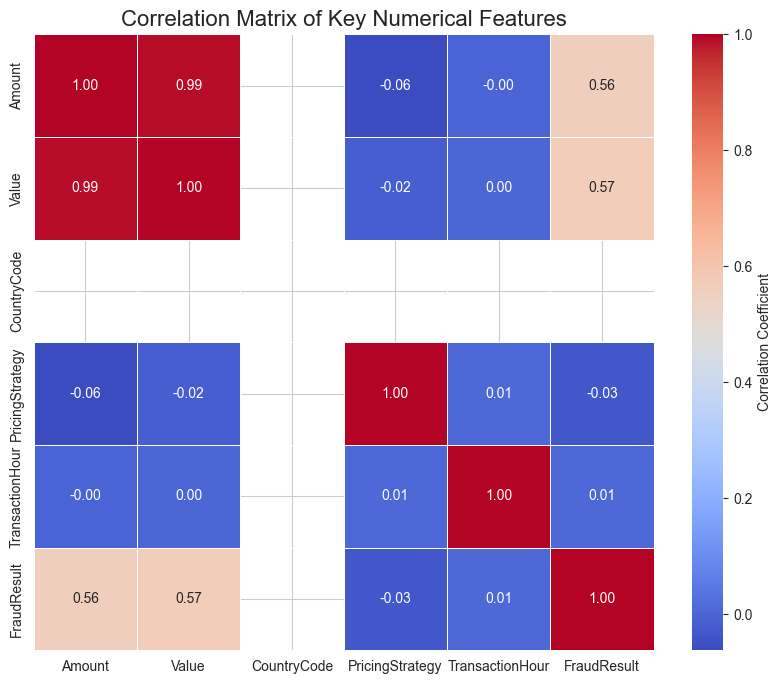


--- Correlation Insights ---
Amount           Amount             1.000000
                 Value              0.989692
FraudResult      Value              0.566739
                 Amount             0.557370
TransactionHour  FraudResult        0.008295
PricingStrategy  TransactionHour    0.007423
Value            TransactionHour    0.000474
TransactionHour  Amount            -0.001611
PricingStrategy  Value             -0.017020
FraudResult      PricingStrategy   -0.033821
dtype: float64

Task 2: EDA Complete. Summarize the findings below.


In [5]:
### 6. Correlation Analysis

print("\n--- 6.1 Correlation Analysis of Numerical Features ---")

# Define all numerical features (including the extracted time feature and FraudResult as a check)
NUMERICAL_FEATURES_FINAL = [
    'Amount', 'Value', 'CountryCode', 'PricingStrategy',
    'TransactionHour', 'FraudResult'
]

# Ensure the columns exist before processing
available_cols = [col for col in NUMERICAL_FEATURES_FINAL if col in df.columns]
correlation_matrix = df[available_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Key Numerical Features', fontsize=16)
plt.show()

print("\n--- Correlation Insights ---")
# Analyze the correlation matrix to find relationships (e.g., strong correlation between Amount and Value,
# or a weak correlation between TransactionHour and FraudResult).
print(correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10))

# Cleanup the temporary columns created for visualization
df.drop(columns=['TransactionHour', 'TransactionDayOfWeek', 'TransactionDate'], errors='ignore', inplace=True)
if 'Value_abs' in df.columns:
    df.drop(columns=['Value_abs', 'Value_log'], errors='ignore', inplace=True)

print("\nTask 2: EDA Complete. Summarize the findings below.")